In [1]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
import json 

# Path to the JSON file
csv_file_path = 'Resources/data.csv'

# Load JSON file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the Data
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [2]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [3]:
# Check NULL values
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [4]:
# Checking the dataframe shape/volume
df.shape

(2226382, 12)

In [5]:
# Clean the data of NULLS
df_dedup = df.copy()
df_dedup = df_dedup.dropna()

# Check the data volume - NULLS removed
len(df_dedup)

1084909

In [6]:
# Volume of data by state
df_dedup['state'].value_counts().sort_values

<bound method Series.sort_values of state
California              157724
Florida                 107570
Texas                   106040
Arizona                  50269
Pennsylvania             42670
Georgia                  42384
Washington               41159
New York                 38883
Illinois                 38473
Virginia                 38363
Ohio                     35571
Maryland                 30527
Minnesota                27553
North Carolina           27370
Massachusetts            24866
Oklahoma                 22901
Missouri                 20675
Oregon                   18430
New Jersey               16190
Colorado                 15219
Michigan                 14806
Wisconsin                12998
Iowa                     12747
Tennessee                12388
South Carolina           11275
Kentucky                 10868
Alabama                   9519
Idaho                     9162
New Mexico                8871
Louisiana                 8266
Arkansas                  81

In [7]:
# Filter only Illinois
df_florida = df_dedup.loc[df['state'] == 'Illinois']
df_florida['state'].value_counts()
 

state
Illinois    38473
Name: count, dtype: int64

# Median Size of The House - Analysis

### Cherry City, Roxana and Fillmore the top 3 cities with largest homes being sold.

<Axes: title={'center': 'Median size of the house (Illinois)'}, ylabel='city'>

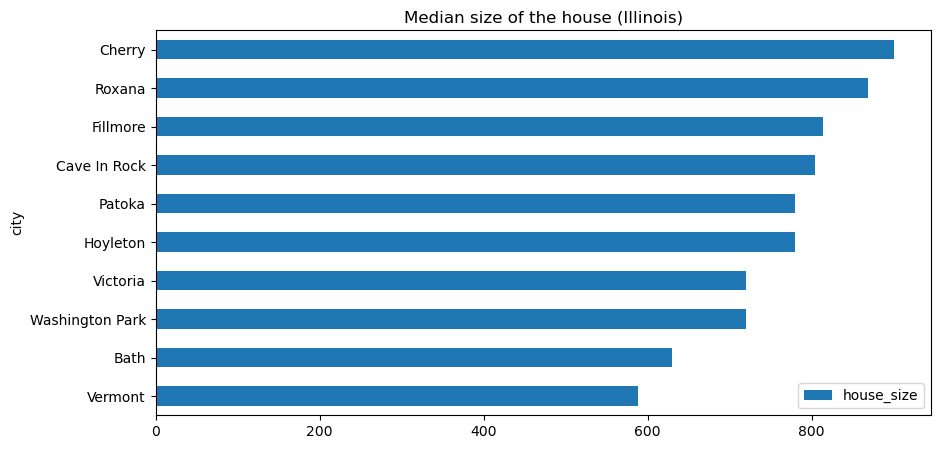

In [8]:
df_florida.groupby('city').agg({'house_size':'median'}).sort_values(by='house_size',ascending = True).head(10).plot(kind = 'barh',
                                    figsize=(10,5),title = 'Median size of the house (Illinois)')

# Price by City in Illinois - Analysis

### Chicago city has the highest home sales value in Illinois.

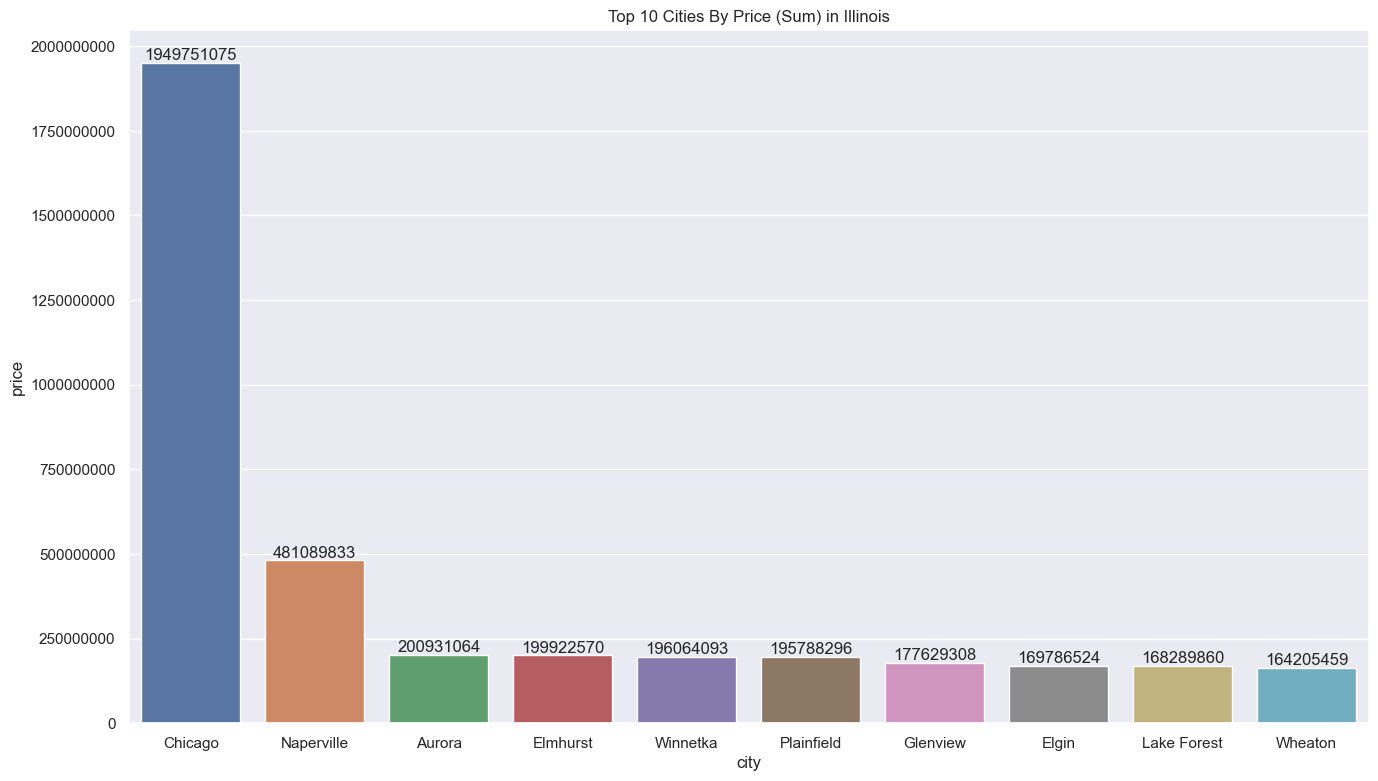

In [16]:
# Plot Price by City (Top 10)
price_city = df_florida.groupby('city', as_index=False)['price'].sum().sort_values(by='price', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,9)})
fig = sns.barplot(data=price_city, x='city', y='price', hue='city', dodge=False)

for i in fig.containers:
    fig.bar_label(i,fmt='%.0f')

plt.xlabel = 'City'
plt.ylabel = 'Price'
plt.title("Top 10 Cities By Price (Sum) in Illinois")

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show(fig)


In [10]:
# Get Date Values
df_florida['prev_sold_date'] = pd.to_datetime(df_florida.prev_sold_date)
date_col = pd.DatetimeIndex(df_florida['prev_sold_date'])
df_florida['Years'] = date_col.year
df_florida['Month'] = date_col.month

C:\Users\User\AppData\Local\Temp\ipykernel_6564\2119454668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['prev_sold_date'] = pd.to_datetime(df_florida.prev_sold_date)
C:\Users\User\AppData\Local\Temp\ipykernel_6564\2119454668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['Years'] = date_col.year
C:\Users\User\AppData\Local\Temp\ipykernel_6564\2119454668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

# Cost of House Sold Over 10 Years Period - Analysis

### The home prices declined drastically from 2010 to 2022.

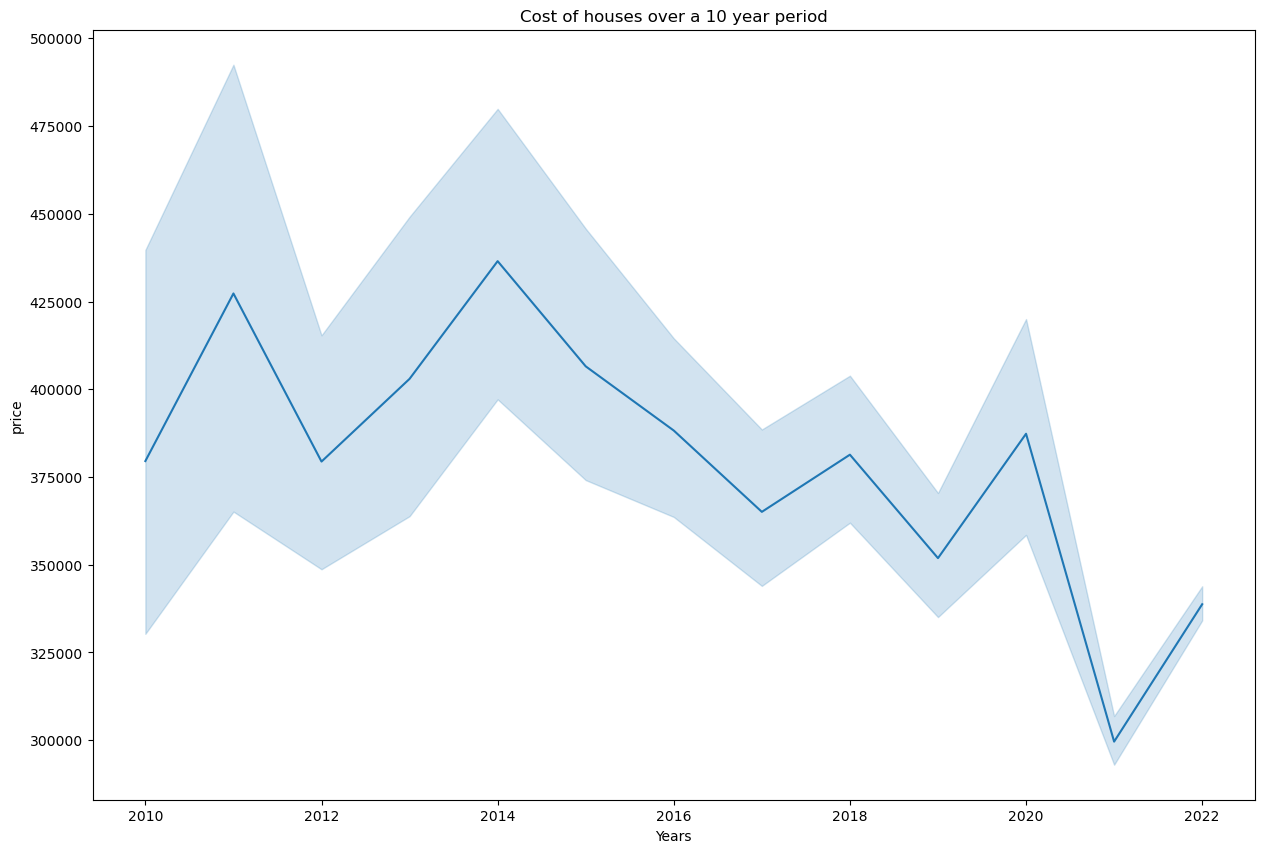

In [11]:
# Get home sale values for past 10 years
plt.figure(figsize=(15,10))
sns.lineplot(x='Years',y='price',data = df_florida[df_florida['Years']>=2010]).set(title='Cost of houses over a 10 year period');

# Regression

In [12]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [25]:
# Prepare data for regression testing

ml = pd.get_dummies(df_florida,columns = ['state'])
ml = ml.drop(columns = ['status','city','zip_code','prev_sold_date'])

X = ml.drop('price',axis = 1)
y = ml['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=65)

In [26]:
# Using Random Forest

regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.6926676035755113